# Logistic Regression from Scratch with a Neural Network Approach

## 1. Import Libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

# 2. Generate and Visualize Data


dimension de x: (100, 2)
dimension de y: (100, 1)


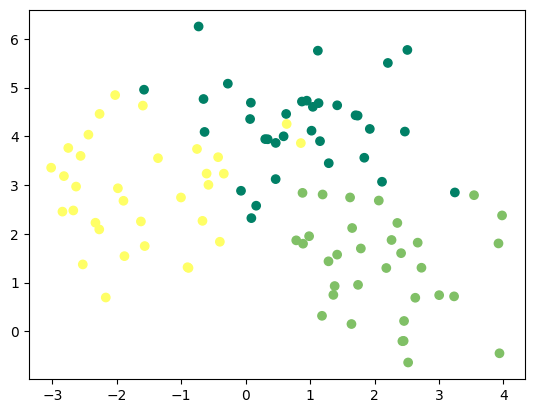

In [2]:
x,y= make_blobs(n_samples=100,n_features=2,random_state=0)
y=y.reshape((y.shape[0],1))

print('dimension de x:',x.shape)
print('dimension de y:',y.shape)

plt.scatter(x[:,0],x[:,1],c=y, cmap='summer')
plt.show()

## 3. Model Initialization


In [3]:
# Initialisation
def initialisation(x):
  w=np.random.randn(x.shape[1],1)
  b=np.random.randn(1)
  return w,b

In [4]:
w,b =initialisation(x)

## 4. Logistic Regression Model


In [5]:
# model
def model(x,w,b):
  z=x.dot(w)+b
  A=1/(1+np.exp(-z))
  return A

In [6]:
A=model(x,w,b)
A.shape

(100, 1)

## 5.Loss Function (Log Loss)

In [7]:
def log_loss(A,y):
  return 1/len(y)*np.sum(-y*np.log(A)-(1-y)*np.log(1-A))

## 6. Gradients

In [8]:
def gradients(A,x,y):
  dw=1/len(y)*np.dot(x.T,A-y)
  db=1/len(y)*np.sum(A-y)
  return dw,db

## 7. Update Rule

In [9]:
def update(w,b,dw,db,alpha):
  w=w-alpha*dw
  b=b-alpha*db
  return w,b

## 8. Prediction

In [10]:
def predict(x,w,b):
  A=model(x,w,b)
  print(A)
  return A >= 0.5

In [11]:
def predict(x,w,b):
  A=model(x,w,b)
  return A >= 0.5

## 9. Artificial Neural Network Function

In [12]:
def artificial_neural_network(x, y, alpha=0.1, iterations=1000):
    # Initialize weights and bias
    w, b = initialisation(x)

    Loss = []

    for i in range(iterations):
        A = model(x, w, b)  # Forward propagation
        Loss.append(log_loss(A, y))  # Compute and store the loss
        dw, db = gradients(A, x, y)  # Compute the gradients
        w, b = update(w, b, dw, db, alpha)  # Update weights and bias

    y_pred = predict(x, w, b)  # Predict labels for the training data
    print('Accuracy:', accuracy_score(y, y_pred))  # Print accuracy

    # Plot the loss curve
    plt.plot(Loss)
    plt.title('Loss over iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.show()

## 10. Run the Neural Network

<ipython-input-7-d8086d7c0d89>:2: RuntimeWarning: divide by zero encountered in log
  return 1/len(y)*np.sum(-y*np.log(A)-(1-y)*np.log(1-A))
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Accuracy: 0.21


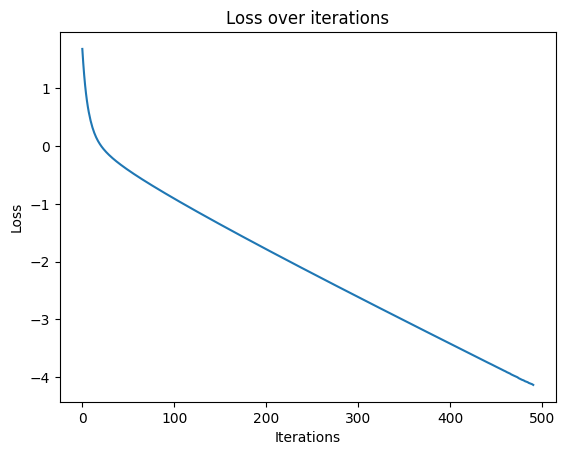

In [13]:
artificial_neural_network(x,y)